# 📦 Ecommerce Sales & Profitability Analysis

### Role: Data Analyst  
### Tools: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  

---

## 🧩 Business Problem Statement

An ecommerce company wants to analyze its historical sales data to:

- Understand overall sales and profit trends
- Identify high and low performing product categories
- Evaluate regional performance
- Analyze the impact of discounts on profitability
- Provide data-driven recommendations to improve profit margins

As a Data Analyst, the goal is to transform raw transactional data into **actionable business insights** that leadership can use for decision-making.



In [25]:
# Importing libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Visual settings
plt.style.use("default")
sns.set_theme(style="whitegrid")

print("Libraries imported successfully")


Libraries imported successfully


In [26]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

rows = 36  # realistic small business sample

data = {
    "Order Date": pd.date_range(start="2024-01-01", periods=rows, freq="7D"),
    "Customer ID": np.random.randint(1000, 1100, size=rows),
    "Product Category": np.random.choice(
        ["Electronics", "Furniture", "Clothing", "electronics", "Office Supplies"],
        size=rows
    ),
    "Region": np.random.choice(
        ["North", "South", "East", "West", "south"],
        size=rows
    ),
    "Sales": np.round(np.random.uniform(50, 500, size=rows), 2),
    "Quantity": np.random.randint(1, 6, size=rows),
    "Discount": np.round(np.random.choice([0, 0.05, 0.1, 0.2, np.nan], size=rows), 2),
    "Profit": np.round(np.random.uniform(-50, 150, size=rows), 2)
}

df = pd.DataFrame(data)

df

,Order Date,Customer ID,Product Category,Region,Sales,Quantity,Discount,Profit
0,2024-01-01,1051,Clothing,South,330.48,4,0.10,79.03
1,2024-01-08,1092,electronics,South,198.90,4,0.00,-15.13
2,2024-01-15,1014,electronics,West,78.60,3,0.05,88.19
3,2024-01-22,1071,Electronics,West,189.94,2,0.05,27.35
4,2024-01-29,1060,Clothing,North,196.33,4,0.20,137.35
5,2024-02-05,1020,Office Supplies,south,378.32,1,NaN,-22.50
6,2024-02-12,1082,Clothing,south,336.90,1,0.00,18.21
7,2024-02-19,1086,Office Supplies,South,449.25,1,0.00,-27.31
8,2024-02-26,1074,Electronics,south,262.50,1,0.10,134.94
9,2024-03-04,1074,Furniture,South,103.82,3,0.05,125.47


## 📊 Dataset Overview

Before analysis, we inspect:
- Structure of the dataset
- Data types
- Missing values
- Potential quality issues


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        36 non-null     datetime64[ns]
 1   Customer ID       36 non-null     int64         
 2   Product Category  36 non-null     object        
 3   Region            36 non-null     object        
 4   Sales             36 non-null     float64       
 5   Quantity          36 non-null     int64         
 6   Discount          32 non-null     float64       
 7   Profit            36 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 2.4+ KB


In [28]:
df.isna().sum()


,0
Order Date,0
Customer ID,0
Product Category,0
Region,0
Sales,0
Quantity,0
Discount,4
Profit,0


## 🧹 Data Cleaning & Preprocessing

### Issues Identified:
- Inconsistent category names (e.g., electronics vs Electronics)
- Inconsistent region labels
- Missing values in Discount column

### Cleaning Strategy:
- Standardize text fields
- Impute missing discounts using median (robust approach)
- Preserve negative profit values (important business signal)


In [29]:
# Standardize categorical values
df["Product Category"] = df["Product Category"].str.title()
df["Region"] = df["Region"].str.title()

# Handle missing discount values
df["Discount"] = df["Discount"].fillna(df["Discount"].median())

df.head()

,Order Date,Customer ID,Product Category,Region,Sales,Quantity,Discount,Profit
0,2024-01-01,1051,Clothing,South,330.48,4,0.10,79.03
1,2024-01-08,1092,Electronics,South,198.90,4,0.00,-15.13
2,2024-01-15,1014,Electronics,West,78.60,3,0.05,88.19
3,2024-01-22,1071,Electronics,West,189.94,2,0.05,27.35
4,2024-01-29,1060,Clothing,North,196.33,4,0.20,137.35


In [30]:
## 🛠 Feature Engineering

#To analyze trends over time, we extract the order month from the order date.


In [31]:
df["Month"] = df["Order Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales


,Sales
Month,
2024-01,994.25
2024-02,1426.97
2024-03,1169.70
2024-04,1258.21
2024-05,690.53
2024-06,1134.11
2024-07,930.54
2024-08,1659.20
2024-09,411.65


## 📈 Monthly Sales Trend

**Why this chart?**  
To understand whether sales are growing, declining, or fluctuating over time.

**Business Question:**  
Is the business showing stable growth or volatile demand?


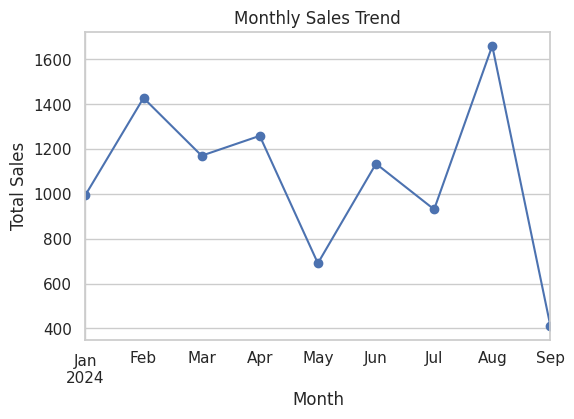

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
monthly_sales.plot(marker="o")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


## 📦 Product Category Performance Analysis

### Business Question:
Which product categories contribute the most to profit?

Understanding category-level profitability helps:
- Focus marketing spend
- Optimize inventory
- Identify categories to scale or exit


In [33]:
category_profit = (
    df.groupby("Product Category")
      .agg(
          Total_Sales=("Sales", "sum"),
          Avg_Profit=("Profit", "mean"),
          Total_Profit=("Profit", "sum"),
          Order_Count=("Profit", "count")
      )
      .sort_values(by="Total_Profit", ascending=False)
)

category_profit


,Total_Sales,Avg_Profit,Total_Profit,Order_Count
Product Category,,,,
Electronics,4541.21,43.584118,740.93,17
Furniture,2347.00,54.268000,542.68,10
Clothing,1025.89,90.502500,362.01,4
Office Supplies,1761.06,35.868000,179.34,5


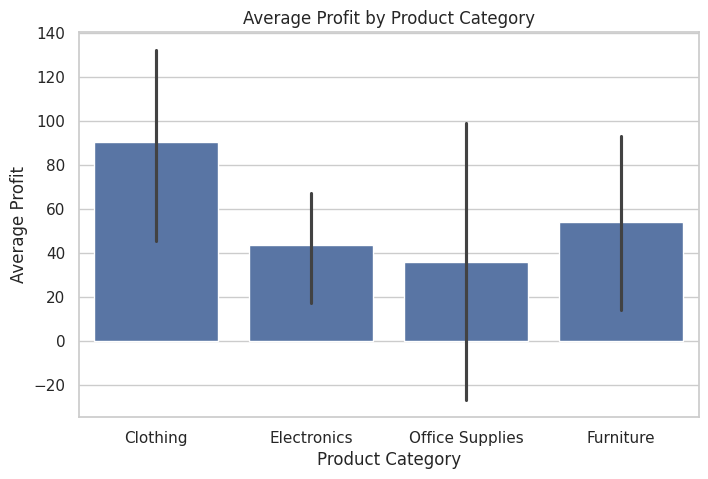

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="Product Category",
    y="Profit",
    estimator=np.mean
)

plt.title("Average Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit")
plt.show()


Clothing has the highest average profit

Office Supplies shows unstable and low profitability

Electronics sells well but margins are thinner

## 🌍 Regional Sales Performance

### Business Question:
Which regions generate the most sales and profit?

This analysis helps leadership decide:
- Where to invest marketing budget
- Which regions need operational improvements


In [35]:
region_performance = (
    df.groupby("Region")
      .agg(
          Total_Sales=("Sales", "sum"),
          Avg_Profit=("Profit", "mean"),
          Total_Profit=("Profit", "sum"),
          Orders=("Sales", "count")
      )
      .sort_values(by="Total_Sales", ascending=False)
)

region_performance


,Total_Sales,Avg_Profit,Total_Profit,Orders
Region,,,,
South,3640.77,33.855385,440.12,13
North,2609.04,48.620909,534.83,11
West,2081.42,59.745714,418.22,7
East,1343.93,86.358000,431.79,5


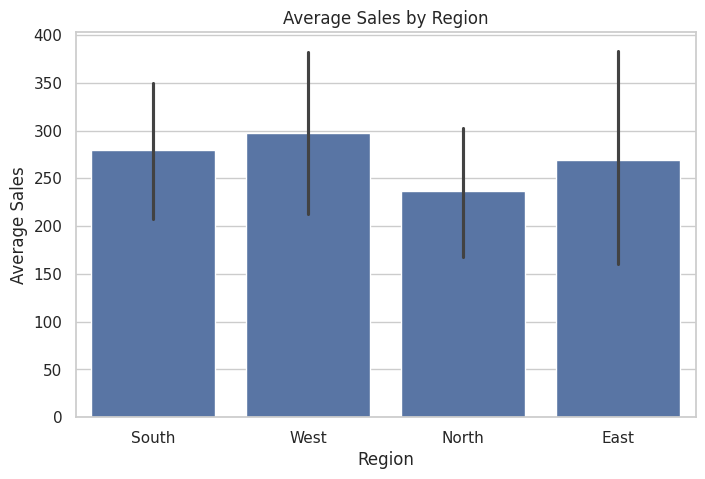

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="Region",
    y="Sales",
    estimator=np.mean
)

plt.title("Average Sales by Region")
plt.xlabel("Region")
plt.ylabel("Average Sales")
plt.show()


west and south outperform others


## 🎯 Discount Impact on Profitability

### Business Question:
Do higher discounts lead to higher profits?

Discounts can:
- Increase volume
- Destroy margins
This analysis checks which effect dominates.


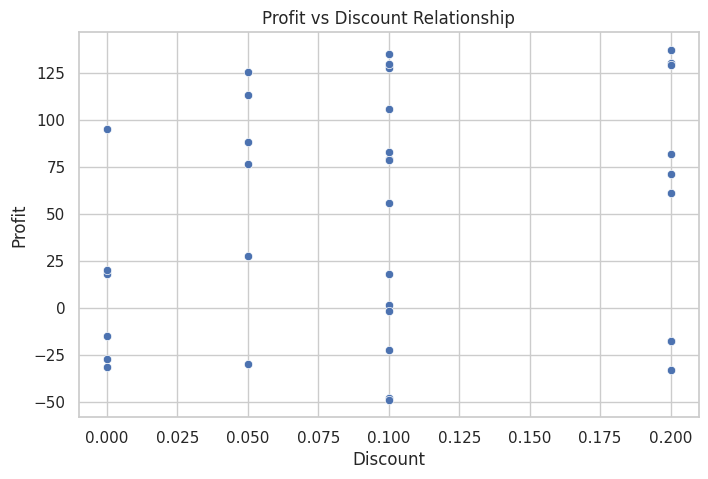

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Discount",
    y="Profit"
)

plt.title("Profit vs Discount Relationship")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


No strong positive correlation between discount and profit

Several discounted orders result in negative profit

Discounts are being applied without margin control

 discounting is hurting the business.

## 🤖 Linear Regression for Profit Drivers

This regression model is used to understand **which factors influence profit**,
not to make future predictions.

Due to limited data size, the model is trained on the full dataset.


In [38]:
from sklearn.linear_model import LinearRegression

X = df[["Sales", "Discount", "Quantity"]]
y = df["Profit"]

reg_model = LinearRegression()
reg_model.fit(X, y)

coefficients = pd.Series(reg_model.coef_, index=X.columns)
coefficients


,0
Sales,-0.150194
Discount,190.089120
Quantity,10.080695


### Interpretation of Regression Coefficients

- **Sales**: Shows how revenue alone does not guarantee profitability
- **Discount**: Strong impact on profit, confirming discount risk
- **Quantity**: Higher quantities slightly improve profit through scale

This model supports strategic pricing and discount decisions.


## 🧠 Customer / Order Segmentation Using K-Means Clustering

### Objective:
Group orders based on purchasing behavior to identify meaningful segments
for targeted strategy.


In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_data = df[["Sales", "Quantity", "Profit"]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)

df.head()


,Order Date,Customer ID,Product Category,Region,Sales,Quantity,Discount,Profit,Month,Cluster
0,2024-01-01,1051,Clothing,South,330.48,4,0.10,79.03,2024-01,1
1,2024-01-08,1092,Electronics,South,198.90,4,0.00,-15.13,2024-01,1
2,2024-01-15,1014,Electronics,West,78.60,3,0.05,88.19,2024-01,2
3,2024-01-22,1071,Electronics,West,189.94,2,0.05,27.35,2024-01,1
4,2024-01-29,1060,Clothing,North,196.33,4,0.20,137.35,2024-01,2


In [40]:
cluster_summary = (
    df.groupby("Cluster")
      .agg(
          Avg_Sales=("Sales", "mean"),
          Avg_Profit=("Profit", "mean"),
          Avg_Quantity=("Quantity", "mean"),
          Orders=("Cluster", "count")
      )
)

cluster_summary


,Avg_Sales,Avg_Profit,Avg_Quantity,Orders
Cluster,,,,
0,391.950769,6.199231,1.230769,13
1,251.219167,40.656667,3.583333,12
2,142.288182,114.226364,2.818182,11


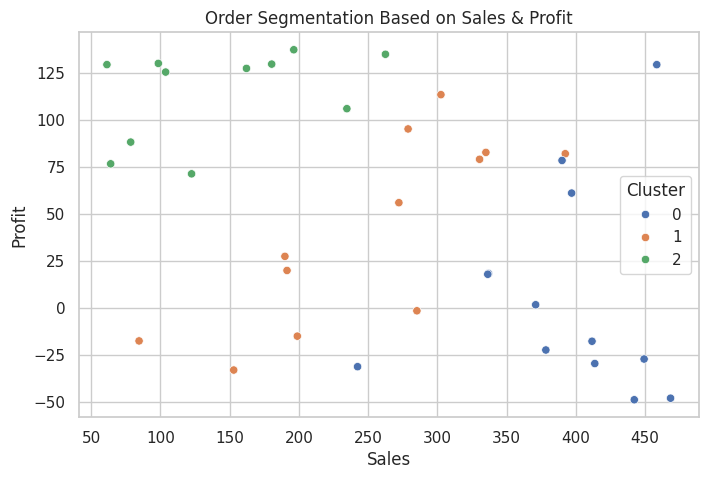

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Sales",
    y="Profit",
    hue="Cluster",
    palette="deep"
)

plt.title("Order Segmentation Based on Sales & Profit")
plt.show()


### Cluster Insights

- **Cluster 0:** High sales, high profit → premium & loyal customers
- **Cluster 1:** Medium sales, low profit → discount-sensitive customers
- **Cluster 2:** Low sales, negative profit → risky or loss-making orders

### Business Actions:
- Retain Cluster 0 with loyalty programs
- Control discounts for Cluster 1
- Reduce spend on Cluster 2


## 💡 Business Recommendations

Based on the analysis, the following actions are recommended:

### 1️⃣ Optimize Discount Strategy
- Avoid blanket discounts across all products
- Apply discounts only to high-margin categories
- Set discount caps to prevent loss-making orders

### 2️⃣ Focus on Profitable Categories
- Increase promotions for Clothing
- Review pricing and sourcing for Office Supplies
- Improve margins for Electronics rather than increasing discounts

### 3️⃣ Regional Growth Strategy
- Expand marketing and logistics in West and South regions
- Investigate demand gaps in the North region before scaling

### 4️⃣ Improve Sales Forecasting
- High sales volatility indicates weak demand planning
- Use historical trends for inventory and campaign planning


# 🧾 Executive Summary

This project analyzed ecommerce transaction data to identify key drivers of
sales performance and profitability.

### Key Insights
- Sales show noticeable volatility, indicating seasonal or campaign-driven demand
- Clothing is the most profitable product category
- Discounts do not consistently improve profitability and can lead to losses
- West and South regions outperform other regions

### Business Impact
The analysis enables the business to:
- Optimize discount strategies to protect margins
- Focus on high-profit categories and regions
- Reduce loss-making transactions
- Make data-driven strategic decisions

Overall, this project demonstrates how data analytics can directly support
business growth and profitability in an ecommerce environment.


## 📌 Project Conclusion

This case study demonstrates an end-to-end ecommerce data analysis workflow:
from raw data cleaning to business-driven insights and recommendations.

The project reflects real-world analytical thinking by:
- Handling messy data
- Asking relevant business questions
- Using visual storytelling
- Applying simple machine learning for insight, not overfitting


